# Frequency Distribution Analysis

In [116]:
import operator 
import json
from collections import Counter
from nltk.corpus import stopwords
import string
from preprocess import preprocess
from nltk import bigrams, trigrams
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="white", context="notebook")

In [15]:
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['RT', 'rt', 'via', 'http', 'https', ':/']

In [154]:
 # term counters
count_terms = Counter()
count_vocab = Counter()
count_no_stop = Counter()
count_words = Counter()
count_hashtag = Counter()
count_mention = Counter()
# n-gram counters
count_bigram_no_stop = Counter()
count_trigram_no_stop = Counter()
#files list
data_list = ['tweets/2016-04-'+str(x)+'.json' for x in ['03', '04', '05', '06', '07', '08', '09', '10', '11', '12']] 
# loop through files
for data in data_list:
    # read json
    with open(data, 'r') as f:
        data_json = json.loads(f.read(), encoding="latin-1")
    # loop tweets
    for tweet in data_json:
        # encode and preprocess
        text = tweet['text'].encode('utf-8').decode('unicode_escape').encode('ascii','ignore')
        terms = [term for term in preprocess(text)]
        # filter
        vocab = set(terms)
        no_stop = [term for term in terms if term not in stop]
        words = [term for term in no_stop if not term.startswith(('#', '@'))]
        hashtag = [term for term in terms if term.startswith('#')]
        mention = [term for term in terms if term.startswith('@')]
        # n-gram
        bigram_no_stop = bigrams(no_stop)
        trigram_no_stop = trigrams(no_stop)
        # update counter objects
        count_terms.update(terms)
        count_vocab.update(vocab)
        count_no_stop.update(no_stop)
        count_words.update(words)
        count_hashtag.update(hashtag)
        count_mention.update(mention)
        count_bigram_no_stop.update(bigram_no_stop)
        count_trigram_no_stop.update(trigram_no_stop)

In [155]:
print "term counts"
print count_terms.most_common(10)
print "vocab counts"
print count_vocab.most_common(10)
print "no stop counts"
print count_no_stop.most_common(10)
print "words counts"
print count_words.most_common(10)
print "hashtag counts"
print count_hashtag.most_common(10)
print "mention counts"
print count_mention.most_common(10)
print "bigram counts"
print count_bigram_no_stop.most_common(10)
print "trigram counts"
print count_trigram_no_stop.most_common(10)

term counts
[(':', 110254), ('.', 92476), ('RT', 90862), ('#Brexit', 73317), ('the', 69101), ('to', 52370), (',', 39210), ('?', 37267), ('EU', 35258), ('of', 31204)]
vocab counts
[(':', 92605), ('RT', 88681), ('#Brexit', 72761), ('.', 56121), ('the', 52373), ('to', 42874), ('EU', 33015), (',', 29829), ('of', 28224), ('in', 23311)]
no stop counts
[('#Brexit', 73317), ('EU', 35258), ('#VoteLeave', 18586), ('#LeaveEU', 14295), ('The', 12671), ('#brexit', 10476), ('UK', 10358), ('#StrongerIn', 9375), ('#EU', 8393), ('vote', 8183)]
words counts
[('EU', 35258), ('The', 12671), ('UK', 10358), ('vote', 8183), ('I', 6865), ('Britain', 6088), ('would', 5826), ('money', 5636), ('Cameron', 5145), ('us', 4519)]
hashtag counts
[('#Brexit', 73317), ('#VoteLeave', 18586), ('#LeaveEU', 14295), ('#brexit', 10476), ('#StrongerIn', 9375), ('#EU', 8393), ('#EUref', 5143), ('#EUreferendum', 4625), ('#TakeControl', 3093), ('#BREXIT', 2464)]
mention counts
[('@LeaveEUOfficial', 7713), ('@vote_leave', 6902), (

In [134]:
count_words.most_common(100)

[('EU', 35258),
 ('The', 12671),
 ('UK', 10358),
 ('vote', 8183),
 ('I', 6865),
 ('Britain', 6088),
 ('would', 5826),
 ('money', 5636),
 ('Cameron', 5145),
 ('us', 4519),
 ('people', 4485),
 ('NHS', 4429),
 ('We', 4039),
 ('says', 3990),
 ('If', 3990),
 ('propaganda', 3929),
 ('could', 3884),
 ('leave', 3847),
 ('Europe', 3773),
 ('want', 3728),
 ('campaign', 3569),
 ('leaflet', 3485),
 ('referendum', 3316),
 ('June', 3261),
 ('23', 3238),
 ('like', 3231),
 ('A', 3141),
 ('back', 3106),
 ('British', 2951),
 ('https://t', 2854),
 ('David', 2854),
 ('9', 2811),
 ('Dutch', 2793),
 ('h', 2762),
 ('m', 2751),
 ('https://t.', 2741),
 ('need', 2542),
 ('trade', 2524),
 ('What', 2505),
 ("don't", 2390),
 ('htt', 2380),
 ('say', 2369),
 ('taxpayers', 2369),
 ('This', 2314),
 ('Brexit', 2293),
 ('better', 2270),
 ('spend', 2221),
 ('get', 2219),
 ('safer', 2211),
 ('European', 2120),
 ('country', 2113),
 ('stay', 2108),
 ('think', 2108),
 ('way', 2101),
 ('make', 2093),
 ('million', 2083),
 ('ht

In [135]:
len_list = []
#files list
data_list = ['tweets/2016-04-'+str(x)+'.json' for x in ['03', '04', '05', '06', '07', '08', '09', '10', '11', '12']] 
# loop through files
for data in data_list:
    # read json
    with open(data, 'r') as f:
        data_json = json.loads(f.read(), encoding="latin-1")
        len_list.append(len(data_json))
        
print "Sum: ", sum(len_list)
print "Average tweets per day: ", np.mean(len_list)

Sum:  127143
Average tweets per day:  12714.3


## Hashtag Analysis

In [29]:
track_stay = ['#yes2eu', '#yestoeu', '#betteroffin', '#votein', '#ukineu', '#bremain', '#strongerin', '#leadnotleave', '#voteremain']

track_leave = ['#brexit', '#no2eu', '#notoeu', '#betteroffout', '#voteout', '#britainout', '#leaveeu', '#loveeuropeleaveeu', '#voteleave', '#beleave']

brexit_track = ['#brexit', '#no2eu', '#notoeu', '#betteroffout', '#voteout', '#britainout', '#leaveeu', '#loveeuropeleaveeu', '#voteleave', '#beleave', '#yes2eu', '#yestoeu', '#betteroffin', '#votein', '#ukineu', '#bremain', '#strongerin', '#leadnotleave', '#voteremain']

In [31]:
top_100_hashtag = count_hashtag.most_common(100)

In [77]:
top_100_hashtag

[('#Brexit', 73317),
 ('#VoteLeave', 18586),
 ('#LeaveEU', 14295),
 ('#brexit', 10476),
 ('#StrongerIn', 9375),
 ('#EU', 8393),
 ('#EUref', 5143),
 ('#EUreferendum', 4625),
 ('#TakeControl', 3093),
 ('#BREXIT', 2464),
 ('#EURef', 2417),
 ('#NHS', 2215),
 ('#GO', 2054),
 ('#UK', 2011),
 ('#Remain', 1862),
 ('#UKIP', 1737),
 ('#', 1402),
 ('#StrongerIN', 1244),
 ('#Nexit', 1147),
 ('#EUReferendum', 1098),
 ('#TTIP', 1091),
 ('#BBC', 1073),
 ('#voteleave', 1059),
 ('#Cameron', 967),
 ('#Merkel', 960),
 ('#DavidCameron', 932),
 ('#Greece', 849),
 ('#panamapapers', 841),
 ('#remain', 839),
 ('#UKinEU', 822),
 ('#IMF', 750),
 ('#euref', 749),
 ('#SaveOurSteel', 739),
 ('#bbcqt', 721),
 ('#Britain', 715),
 ('#ukip', 682),
 ('#No2EU', 675),
 ('#INcampaign', 652),
 ('#eureferendum', 608),
 ('#referendum', 589),
 ('#NoJunckerMail', 559),
 ('#DutchReferendum', 542),
 ('#Tsipras', 538),
 ('#Europe', 514),
 ('#strongerin', 487),
 ('#Strongerin', 483),
 ('#Davidcameron', 466),
 ('#BRexit', 455),
 ('

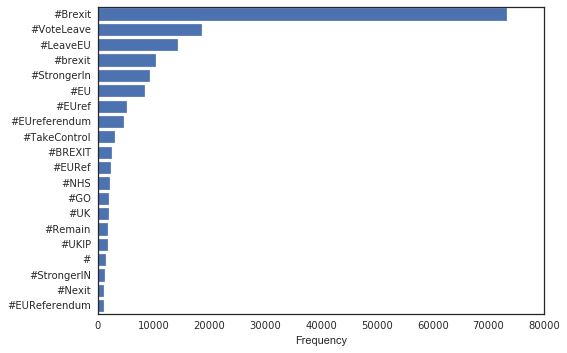

In [151]:
plt.barh([x+0.5 for x in range(20)], list(reversed([x[1] for x in top_100_hashtag[:20]])), align='center')
plt.yticks([x+0.5 for x in range(20)], list(reversed([x[0] for x in top_100_hashtag[:20]])))
plt.xlabel('Frequency')

In [73]:
hashtag_freq_list = [(x, count_hashtag[x]) for x in count_hashtag if x.lower() in brexit_track]

In [75]:
res = []
import operator

for hashtag in hashtag_freq_list:
    if hashtag[0].lower() not in [res_entry[0].lower() for res_entry in res]:
        entries = [entry for entry in hashtag_freq_list if hashtag[0].lower() == entry[0].lower()]
        k = max(entries,key=operator.itemgetter(1))[0]  
        v = sum([entry[1] for entry in entries])
        res.append((k,v))
        
print res

[('#VoteRemain', 492), ('#notoeu', 46), ('#No2EU', 841), ('#LeaveEU', 15245), ('#VoteLeave', 20288), ('#BeLeave', 338), ('#LoveEuropeLeaveEU', 128), ('#britainout', 45), ('#VoteOut', 659), ('#LeadNotLeave', 3), ('#UKinEU', 840), ('#Brexit', 87150), ('#BetterOffOut', 658), ('#yestoeu', 11), ('#votein', 115), ('#StrongerIn', 11700), ('#Yes2EU', 40), ('#Bremain', 567), ('#Betteroffin', 18)]


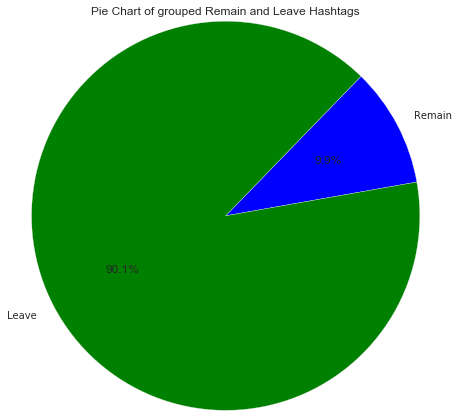

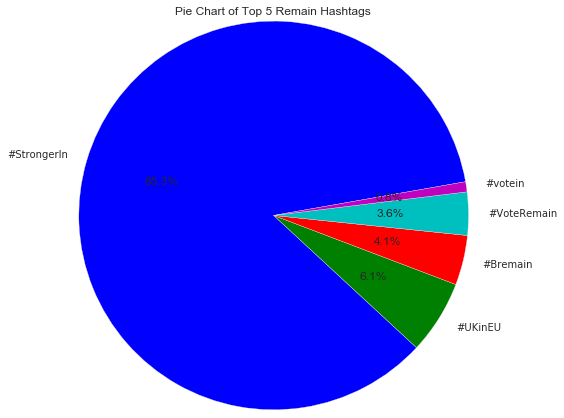

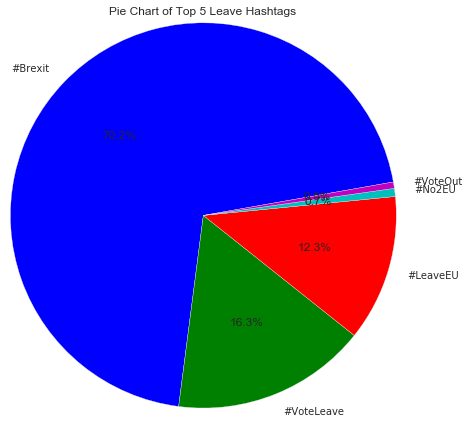

In [130]:
def apple_pie(labels=[], sizes=[], title=None):

    fig = plt.figure(figsize=[7, 7])
    ax = fig.add_subplot(111)

    ax.set_title(title);
    
    ax.pie(sizes,              # data
        labels=labels,      # slice labels
        autopct='%1.1f%%',  # print the values inside the wedges
        shadow=False,        # enable shadow
        startangle=10      # starting angle
        )
    ax.axis('equal')
    
def bars_plot():
    return

remain_freq_list = sorted([x for x in res if x[0].lower() in track_stay], key=lambda x: x[1], reverse=True)[:5]
leave_freq_list = sorted([x for x in res if x[0].lower() in track_leave], key=lambda x: x[1], reverse=True)[:5]

# remain or leave
labels = ['Remain', 'Leave']
sizes = [sum([x[1] for x in remain_freq_list]), sum([x[1] for x in leave_freq_list])]

apple_pie(labels, sizes, "Pie Chart of grouped Remain and Leave Hashtags")

# inter-remain
labels = [x[0] for x in remain_freq_list]
sizes = [x[1] for x in remain_freq_list]

apple_pie(labels, sizes, "Pie Chart of Top 5 Remain Hashtags")


# inter-leave
labels = [x[0] for x in leave_freq_list]
sizes = [x[1] for x in leave_freq_list]

apple_pie(labels, sizes,  "Pie Chart of Top 5 Leave Hashtags")


In [136]:
[sum([x[1] for x in remain_freq_list]), sum([x[1] for x in leave_freq_list])]

[13714, 124183]

In [137]:
[sum([x[1] for x in remain_freq_list]), sum([x[1] for x in leave_freq_list if x[0] != '#Brexit'])]

[13714, 37033]

In [122]:
sorted([x for x in res if x[0].lower() in track_stay], key=lambda x: x[1])

[('#LeadNotLeave', 3),
 ('#yestoeu', 11),
 ('#Betteroffin', 18),
 ('#Yes2EU', 40),
 ('#votein', 115),
 ('#VoteRemain', 492),
 ('#Bremain', 567),
 ('#UKinEU', 840),
 ('#StrongerIn', 11700)]

In [118]:
remain_freq_list

[('#VoteRemain', 492),
 ('#LeadNotLeave', 3),
 ('#UKinEU', 840),
 ('#yestoeu', 11),
 ('#votein', 115),
 ('#StrongerIn', 11700),
 ('#Yes2EU', 40),
 ('#Bremain', 567),
 ('#Betteroffin', 18)]

In [119]:
leave_freq_list

[('#notoeu', 46),
 ('#No2EU', 841),
 ('#LeaveEU', 15245),
 ('#VoteLeave', 20288),
 ('#BeLeave', 338),
 ('#LoveEuropeLeaveEU', 128),
 ('#britainout', 45),
 ('#VoteOut', 659),
 ('#Brexit', 87150),
 ('#BetterOffOut', 658)]